In [2]:
!pip install pandas>=0.25.1
!pip install numpy>=1.17.2
!pip install scikit-learn
!pip install xgboost>=0.90

Defaulting to user installation because normal site-packages is not writeable


In [3]:
conda update -n base -c defaults conda

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - conda


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2023.11.1~ --> pkgs/main/win-64::certifi-2023.11.17-py311haa95532_0 
  conda              conda-forge::conda-23.10.0-py311h1ea4~ --> pkgs/main::conda-23.10.0-py311haa95532_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




In [4]:
conda install -c conda-forge xgboost

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-3.2.0              |       hcfcfb64_0         7.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.8 MB

The following packages will be UPDATED:

  openssl                                  3.1.4-hcfcfb64_0 --> 3.2.0-hcfcfb64_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




In [5]:
conda install graphviz python-graphviz

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - graphviz
    - python-graphviz


The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2023.11.1~ --> pkgs/main/win-64::certifi-2023.11.17-py311haa95532_0 
  conda              conda-forge::conda-23.10.0-py311h1ea4~ --> pkgs/main::conda-23.10.0-py311haa95532_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
# from sklearn.metrics.plot_confusion_matrix

In [3]:
df = pd.read_csv('C:\\Users\\AI WAHAJ\\WAHAJ BIXBYTE\\XGBOOST\\Telco-Customer-Churn.csv')

In [ ]:
conda update -c conda-forge scikit-learn

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# df['Count'].unique()
        

In [ ]:
# df['Country'].unique()

In [ ]:
# df['State'].unique()

In [5]:
df.drop(['customerID'],
       axis = 1, inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


ValueError: Unable to parse string " " at position 488

In [7]:
len(df.loc[df['TotalCharges'] == ' '])

11

In [8]:
df.loc[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.loc[(df['TotalCharges']==' '), 'TotalCharges'] = 0

In [10]:
df.loc[df['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df.replace(' ', '_', regex=True, inplace=True)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


In [15]:
X = df.drop('Churn', axis = 1).copy()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65


In [16]:
y = df['Churn'].copy()

In [17]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [18]:
y = y.replace({'Yes': 1, 'No': 0})

In [19]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [20]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [21]:
X_encoded = pd.get_dummies(X, columns= ['gender',
                                        'Partner',
                                        'Dependents',
                                        'PhoneService',
                                        'MultipleLines',
                                        'InternetService',
                                        'OnlineSecurity',
                                        'OnlineBackup',
                                        'DeviceProtection',
                                        'TechSupport',
                                        'StreamingTV',
                                        'StreamingMovies',
                                        'Contract',
                                        'PaperlessBilling',
                                        'PaymentMethod'])
X_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [22]:
y.unique()

array([0, 1], dtype=int64)

In [23]:
sum(y)/len(y)

0.2653698707936959

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state= 42, stratify= y)

In [25]:
sum(y_train)/len(y_train)

0.2654297614539947

In [26]:
sum(y_test)/len(y_test)

0.26519023282226006

In [37]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing = 0, seed = 42)
clf_xgb.fit(X_train,
           y_train,
           verbose = True,
           early_stopping_rounds = 10,
           eval_metric = 'aucpr',
           eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.64097
[1]	validation_0-aucpr:0.63938
[2]	validation_0-aucpr:0.63587
[3]	validation_0-aucpr:0.64538
[4]	validation_0-aucpr:0.64726
[5]	validation_0-aucpr:0.64262
[6]	validation_0-aucpr:0.64269
[7]	validation_0-aucpr:0.64035
[8]	validation_0-aucpr:0.63862
[9]	validation_0-aucpr:0.64441
[10]	validation_0-aucpr:0.64473
[11]	validation_0-aucpr:0.64266
[12]	validation_0-aucpr:0.64338
[13]	validation_0-aucpr:0.64284
[14]	validation_0-aucpr:0.64164


C:\Users\AI WAHAJ\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\AI WAHAJ\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

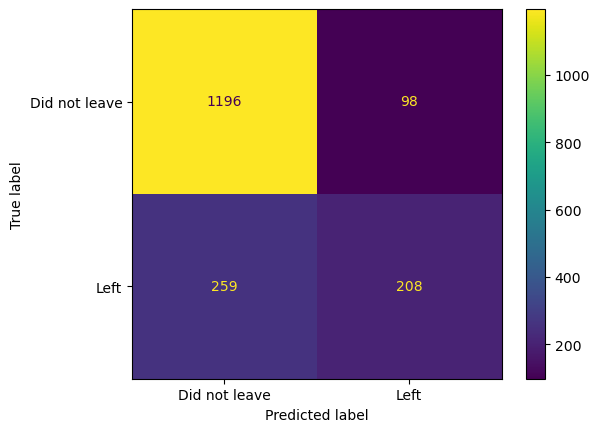

In [28]:
# plot_confusion_matrix(clf_xgb, X_test, y_test, values_format = 'd', display_labels = ["Did not leave", "Left"])
# from sklearn.metrics.plotting import plot_confusion_matrix
# disp = plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d', display_labels=["Did not leave", "Left"])
# disp.ax_.set_title('Confusion Matrix')
# plt.show()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did not leave", "Left"])
disp.plot(values_format='d')
plt.show()


In [29]:
##ROUND 1:
param_grid = {
    'max_depth': [3, 4 ,5],
    'learning_rate': [0.1, 0.01, 0.01],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5]
}

In [32]:
optimal_params = GridSearchCV(estimator = xgb.XGBClassifier(objective='binary:logistic', 
                                 seed = 42,
                                 subsample = 0.9,
                                 colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose = 2,
    n_jobs = 10,
    cv = 3
)

In [33]:
optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds = 10,
                  eval_metric = 'auc',
                  eval_set = [(X_test, y_test)],
                   verbose = False)
print(optimal_params.best_params_)
                   

Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\AI WAHAJ\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\AI WAHAJ\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 10.0, 'scale_pos_weight': 1}


In [38]:
clf_xgb = xgb.XGBClassifier(seed = 42,
                       objective= 'binary:logistic',
                       gamma = 1.0,
                       learning_rate = 0.1,
                       max_depth = 3,
                       reg_lambda = 10,
                       scale_pos_weight = 1,
                       subsample = 0.9,
                       colsample_bytree = 0.5
                       )
clf_xgb.fit(X_train,
           y_train,
           verbose = True,
           early_stopping_rounds = 10,
           eval_metric = 'aucpr',
           eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.52227
[1]	validation_0-aucpr:0.57245
[2]	validation_0-aucpr:0.60281
[3]	validation_0-aucpr:0.60547
[4]	validation_0-aucpr:0.60595
[5]	validation_0-aucpr:0.61365
[6]	validation_0-aucpr:0.63323
[7]	validation_0-aucpr:0.63761
[8]	validation_0-aucpr:0.63640
[9]	validation_0-aucpr:0.63942
[10]	validation_0-aucpr:0.64174
[11]	validation_0-aucpr:0.64197
[12]	validation_0-aucpr:0.64560
[13]	validation_0-aucpr:0.64663
[14]	validation_0-aucpr:0.64694
[15]	validation_0-aucpr:0.64719
[16]	validation_0-aucpr:0.64653
[17]	validation_0-aucpr:0.64479
[18]	validation_0-aucpr:0.64445
[19]	validation_0-aucpr:0.64780


C:\Users\AI WAHAJ\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\AI WAHAJ\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-aucpr:0.64548
[21]	validation_0-aucpr:0.64569
[22]	validation_0-aucpr:0.64519
[23]	validation_0-aucpr:0.64784
[24]	validation_0-aucpr:0.64722
[25]	validation_0-aucpr:0.64596
[26]	validation_0-aucpr:0.64600
[27]	validation_0-aucpr:0.64512
[28]	validation_0-aucpr:0.64536
[29]	validation_0-aucpr:0.64280
[30]	validation_0-aucpr:0.64613
[31]	validation_0-aucpr:0.64883
[32]	validation_0-aucpr:0.64977
[33]	validation_0-aucpr:0.64998
[34]	validation_0-aucpr:0.65096
[35]	validation_0-aucpr:0.65105
[36]	validation_0-aucpr:0.65170
[37]	validation_0-aucpr:0.65352
[38]	validation_0-aucpr:0.65218
[39]	validation_0-aucpr:0.65291
[40]	validation_0-aucpr:0.65265
[41]	validation_0-aucpr:0.65137
[42]	validation_0-aucpr:0.65300
[43]	validation_0-aucpr:0.65236
[44]	validation_0-aucpr:0.65242
[45]	validation_0-aucpr:0.65406
[46]	validation_0-aucpr:0.65453
[47]	validation_0-aucpr:0.65472
[48]	validation_0-aucpr:0.65618
[49]	validation_0-aucpr:0.65618
[50]	validation_0-aucpr:0.65669
[51]	val

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

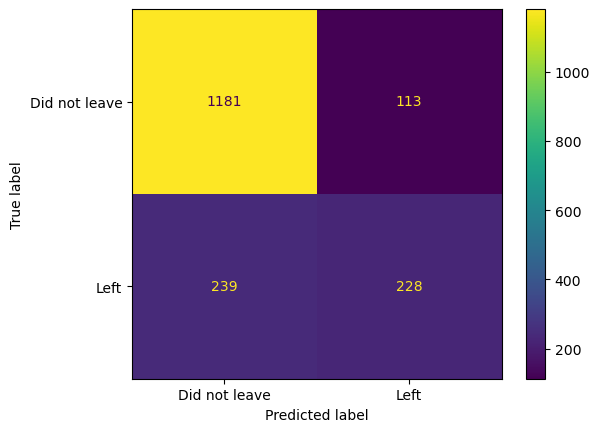

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did not leave", "Left"])
disp.plot(values_format='d')
plt.show()

In [40]:
clf_xgb = xgb.XGBClassifier(seed = 42,
                       objective= 'binary:logistic',
                       gamma = 1.0,
                       learning_rate = 0.1,
                       max_depth = 3,
                       reg_lambda = 10,
                       scale_pos_weight = 1,
                       subsample = 0.9,
                       colsample_bytree = 0.5,
                       n_estimators = 1
                       )
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

weight:  {'OnlineSecurity_No': 2.0, 'TechSupport_No': 2.0, 'Contract_Month-to-month': 1.0, 'PaymentMethod_Electronic_check': 1.0}
gain:  {'OnlineSecurity_No': 98.75503540039062, 'TechSupport_No': 7.601187705993652, 'Contract_Month-to-month': 727.0661010742188, 'PaymentMethod_Electronic_check': 49.01629638671875}
cover:  {'OnlineSecurity_No': 477.06793212890625, 'TechSupport_No': 143.32252502441406, 'Contract_Month-to-month': 954.1358642578125, 'PaymentMethod_Electronic_check': 356.3858947753906}
total_gain:  {'OnlineSecurity_No': 197.51007080078125, 'TechSupport_No': 15.202375411987305, 'Contract_Month-to-month': 727.0661010742188, 'PaymentMethod_Electronic_check': 49.01629638671875}
total_cover:  {'OnlineSecurity_No': 954.1358642578125, 'TechSupport_No': 286.6450500488281, 'Contract_Month-to-month': 954.1358642578125, 'PaymentMethod_Electronic_check': 356.3858947753906}


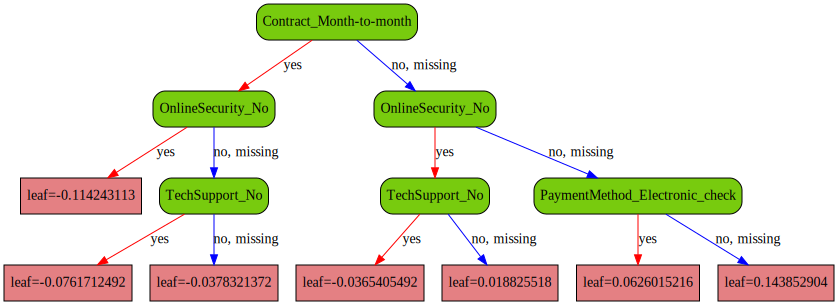

In [42]:
bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' %importance_type, bst.get_score(importance_type=importance_type))
node_params = {'shape': 'box',
              'style': 'filled, rounded',
               'fillcolor': '#78cbe'
              }
leaf_params = {
    'shape': 'box',
    'style': 'filled',
    'fillcolor': '#e48083',
}

xgb.to_graphviz(clf_xgb, num_trees = 0, size = "10,10",
               condition_node_params = node_params,
               leaf_node_params = leaf_params)